In [ ]:
import pandas as pd
import math
df_Time_181 = pd.read_csv('timeseries/timeseriesMerge_181.csv')
df_Time_182 = pd.read_csv('timeseries/timeseriesMerge_182.csv')
df_Time_183 = pd.read_csv('timeseries/timeseriesMerge_183.csv')


LOOKBACK_181 = 100
LOOKBACK_182 = 100
LOOKBACK_183 = 100  ### Closest error to 30 but u will encounter the 1st error at 2 and at also arounf 17


one_hot_encoded_181 = pd.get_dummies(df_Time_181, columns = ['Description','Size'])
one_hot_encoded_182 = pd.get_dummies(df_Time_182, columns = ['Description','Size'])
one_hot_encoded_183 = pd.get_dummies(df_Time_183, columns = ['Description','Size'])

In [ ]:
one_hot_encoded_181['L3 Comment Code/Comment Description'] = one_hot_encoded_181['L3 Comment Code/Comment Description'].fillna(0)
one_hot_encoded_182['L3 Comment Code/Comment Description'] = one_hot_encoded_182['L3 Comment Code/Comment Description'].fillna(0)
one_hot_encoded_183['L3 Comment Code/Comment Description'] = one_hot_encoded_183['L3 Comment Code/Comment Description'].fillna(0)
def replaceBy1(row):
    if row['L3 Comment Code/Comment Description'] !=0:
        return 1
    else:
        return 0

one_hot_encoded_181['L3 Comment Code/Comment Description'] = one_hot_encoded_181.apply(replaceBy1, axis = 1)
one_hot_encoded_182['L3 Comment Code/Comment Description'] = one_hot_encoded_182.apply(replaceBy1, axis = 1)
one_hot_encoded_183['L3 Comment Code/Comment Description'] = one_hot_encoded_183.apply(replaceBy1, axis = 1)


df_timecopy_181 = one_hot_encoded_181.copy()
df_timecopy_182 = one_hot_encoded_182.copy()
df_timecopy_183 = one_hot_encoded_183.copy()

df_timecopy_181.drop(columns=['Unnamed: 0', 'Product Description', 'Prod_Line', 'Date', 'Contact Summary English1', 'L3 Comment Code/Comment Description','Internal Case Id'],inplace=True)
df_timecopy_182.drop(columns=['Unnamed: 0', 'Product Description', 'Prod_Line', 'Date', 'Contact Summary English1', 'L3 Comment Code/Comment Description','Internal Case Id'],inplace=True)
df_timecopy_183.drop(columns=['Unnamed: 0', 'Product Description', 'Prod_Line', 'Date', 'Contact Summary English1', 'L3 Comment Code/Comment Description','Internal Case Id'],inplace=True)

In [ ]:
cols_181 = list(df_timecopy_181.columns)

for i in range(0,LOOKBACK): #LOOKBACK_181
    mystring = 'Shift_'+str(i+1)+'_'  
    shifted_cols = [mystring + s for s in cols_181]
    df_for_temp = df_timecopy_181.copy()
    df_for_temp = df_for_temp.shift(periods=(i+1))
    df_for_temp.columns = shifted_cols
    # print(one_hot_encoded_181.shape)
    one_hot_encoded_181 = pd.concat([one_hot_encoded_181,df_for_temp],axis=1)
    col_name = 'Shift_'+str(i+1)+'_Time'
    # print(one_hot_encoded_181.shape)

    def timeDeltaCreate(row):
        global col_name
        # print(row.shape)
        if row[col_name] != math.isnan:
            return (pd.to_datetime(row['Time']) - pd.to_datetime(row[col_name])) / pd.Timedelta('1 hour')
        else:
            return None
    one_hot_encoded_181[col_name] = one_hot_encoded_181.apply(timeDeltaCreate,axis=1)  

In [ ]:
cols_182 = list(df_timecopy_182.columns)

for i in range(0,LOOKBACK_182): #LOOKBACK_182
    mystring = 'Shift_'+str(i+1)+'_'  
    shifted_cols = [mystring + s for s in cols_182]
    df_for_temp = df_timecopy_182.copy()
    # df_for_temp[mystring+'time_delta'] = ''              
    df_for_temp = df_for_temp.shift(periods=(i+1))
    df_for_temp.columns = shifted_cols
    one_hot_encoded_182 = pd.concat([one_hot_encoded_182,df_for_temp],axis=1)
    col_name = 'Shift_'+str(i+1)+'_Time'
    # print(one_hot_encoded_182.shape)

    def timeDeltaCreate(row):
        global col_name
        # print(row.shape)
        if row[col_name] != math.isnan:
            return (pd.to_datetime(row['Time']) - pd.to_datetime(row[col_name])) / pd.Timedelta('1 hour')
        else:
            return None
    one_hot_encoded_182[col_name] = one_hot_encoded_182.apply(timeDeltaCreate,axis=1)

In [ ]:
cols_183 = list(df_timecopy_183.columns)

for i in range(0,LOOKBACK_183): #LOOKBACK_183
    mystring = 'Shift_'+str(i+1)+'_'  
    shifted_cols = [mystring + s for s in cols_183]
    df_for_temp = df_timecopy_183.copy()  
    # df_for_temp[mystring+'time_delta'] = ''       
    df_for_temp = df_for_temp.shift(periods=(i+1))
    df_for_temp.columns = shifted_cols
    one_hot_encoded_183 = pd.concat([one_hot_encoded_183,df_for_temp],axis=1)
    col_name = 'Shift_'+str(i+1)+'_Time'
    # print(one_hot_encoded_183.shape)

    def timeDeltaCreate(row):
        global col_name
        # print(row.shape)
        if row[col_name] != math.isnan:
            return (pd.to_datetime(row['Time']) - pd.to_datetime(row[col_name])) / pd.Timedelta('1 hour')
        else:
            return None
    one_hot_encoded_183[col_name] = one_hot_encoded_183.apply(timeDeltaCreate,axis=1)


In [ ]:
one_hot_encoded_181.to_csv('shifted_data/shiftedTimeseries_LB'+str(LOOKBACK_181)+'_181.csv')
one_hot_encoded_182.to_csv('shifted_data/shiftedTimeseries_LB'+str(LOOKBACK_182)+'_182.csv')
one_hot_encoded_183.to_csv('shifted_data/shiftedTimeseries_LB'+str(LOOKBACK_183)+'_183.csv')

Above cell conludes data generation part and the data is large it cant be exported to Github and needs to be everytime generated to run the model

The below cell needs to be run 3 times changing the data btw diff lines

In [62]:
import pandas as pd
one_hot = pd.read_csv('shifted_data/shiftedTimeseries_LB100_181.csv')
# one_hot = pd.read_csv('shifted_data/shiftedTimeseries_LB100_182.csv')
# one_hot = pd.read_csv('shifted_data/shiftedTimeseries_LB100_183.csv')
one_hot['Time'] = pd.to_datetime(one_hot['Time'])
one_hot = one_hot.sort_values(by = 'Time')
one_hot = one_hot.iloc[100: , :]
one_hot.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Time','Prod_Line','Product Description','Date','Contact Summary English1','Internal Case Id'], inplace=True)
drop_cols = one_hot.columns[one_hot.isna().any()].tolist()
one_hot.drop(columns=drop_cols,inplace=True)

# one_hot = one_hot[one_hot['Description_HL2'] == 1].copy()
one_hot.sort_values('L3 Comment Code/Comment Description', inplace=True)
# from pyod.models.copod import COPOD
# from pyod.models.mo_gaal import MO_GAAL
# from pyod.models.auto_encoder import AutoEncoder
from sklearn.model_selection import train_test_split
X = one_hot.loc[:, one_hot.columns != 'L3 Comment Code/Comment Description']
X = X.loc[:, X.columns != 'Date']
print("X shape full",X.shape,"\n")
subsetCols = []
cols = X.columns
for each in cols:
    # if 'Value_' in each  or 'Description_' in each or 'Size_' in each :
    if 'Value_' in each or 'Description_' in each or 'Size_' in each or '_Time' in each:
        subsetCols.append(each)
X = X[subsetCols].copy()
cols = X.columns
print("X shape only values, size and desc ",X.shape,"\n")
# X.drop(X.tail(10).index,inplace = True)

Y = one_hot['L3 Comment Code/Comment Description']
# Y =  Y.shift(-10, axis = 0)
# Y.drop(Y.tail(10).index,inplace = True)
from sklearn.preprocessing import StandardScaler
x = X.values
# x_scaled = min_max_scaler.fit_transform(x)
# X = pd.DataFrame(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,shuffle=True, random_state=42)
# min_max_scaler = StandardScaler()

# X_train= min_max_scaler.fit_transform(X_train)    
# X_test= min_max_scaler.transform(X_test) 

# from sklearn.svm import SVC # "Support vector classifier"  
# classifier = SVC(kernel='rbf', random_state=0, class_weight={1: Y.value_counts()[0]/Y.value_counts()[1]})  
# classifier = SVC(kernel='poly', random_state=0 )  
# classifier.fit(X_train, y_train)  
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
model = XGBClassifier(scale_pos_weight=100)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
# # summarize performance
# print('Mean ROC AUC: %.5f' % mean(scores))

model.fit(X=X_train,y=y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
y_train_pred= model.predict(X_train)  

print("ROC score for train set - ",roc_auc_score(y_train, y_train_pred, average=None))
[tn,fp],[fn, tp]=confusion_matrix(y_train, y_train_pred)
print("Training set:\nTrue negative - ",tn,"\nFalse positive - ", fp,"\nFalse negative - ", fn,"\nTrue positive - ", tp)
y_test_pred= model.predict(X_test)  
print("\nROC score for train set - ",roc_auc_score(y_test, y_test_pred, average=None))
[tn,fp],[fn, tp]=confusion_matrix(y_test, y_test_pred)
print("Test set:\nTrue negative - ",tn,"\nFalse positive - ", fp,"\nFalse negative - ", fn,"\nTrue positive - ", tp)


Columns (156,157) have mixed types. Specify dtype option on import or set low_memory=False.


X shape full (7831, 14644) 

X shape only values, size and desc  (7831, 3433) 



The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[12:44:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC score for train set -  1.0
Training set:
True negative -  4946 
False positive -  0 
False negative -  0 
True positive -  300

ROC score for train set -  0.9914819587628867
Test set:
True negative -  2414 
False positive -  11 
False negative -  2 
True positive -  158


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


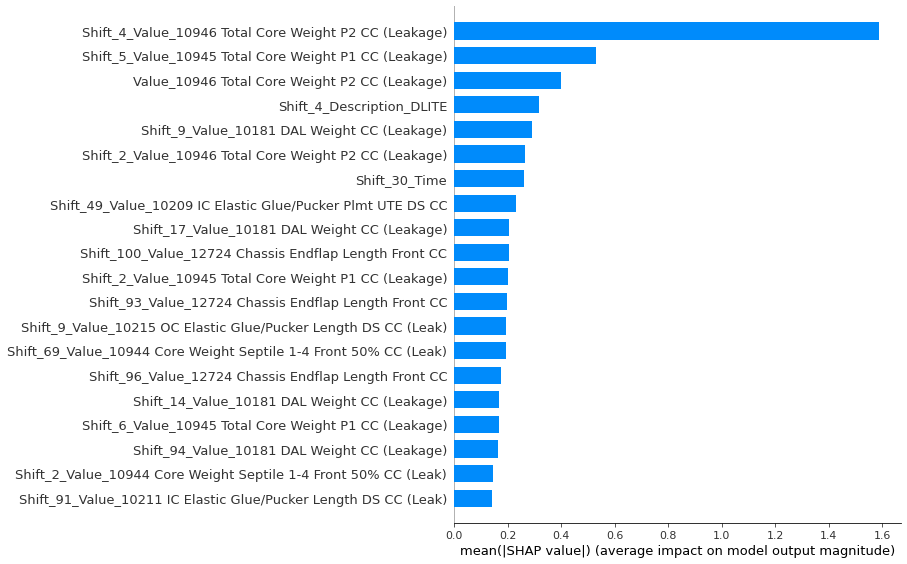

In [63]:
import shap
shap.initjs()
X.columns = cols
X_train.columns = cols
X_test.columns = cols
import xgboost
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [81]:
def global_shap_importance(model, X):
    """ Return a dataframe containing the features sorted by Shap importance
    Parameters
    ----------
    model : The tree-based model 
    X : pd.Dataframe
         training set/test set/the whole dataset ... (without the label)
    Returns
    -------
    pd.Dataframe
        A dataframe containing the features sorted by Shap importance
    """
    explainer = shap.Explainer(model)
    shap_values = explainer(X)
    cohorts = {"": shap_values}
    cohort_labels = list(cohorts.keys())
    cohort_exps = list(cohorts.values())
    for i in range(len(cohort_exps)):
        if len(cohort_exps[i].shape) == 2:
            cohort_exps[i] = cohort_exps[i].abs.mean(0)
    features = cohort_exps[0].data
    feature_names = cohort_exps[0].feature_names
    values = np.array([cohort_exps[i].values for i in range(len(cohort_exps))])
    feature_importance = pd.DataFrame(
        list(zip(feature_names, sum(values))), columns=['features', 'importance'])
    feature_importance.sort_values(
        by=['importance'], ascending=False, inplace=True)
    return feature_importance
feat_imps = global_shap_importance(model, X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [82]:
feat_imps
feat_imps = feat_imps.set_index('features').T.to_dict('list')
for key in list(feat_imps.keys()):
    feat_imps[key] = feat_imps[key][0]


In [83]:
df_LEAKAGE_181 = pd.read_excel('dataset/Leakage variables.for Last oneand year.xlsx', skiprows=4, sheet_name='DIHD181')
# df_LEAKAGE_182 = pd.read_excel('dataset/Leakage variables.for Last oneand year.xlsx', skiprows=4, sheet_name='DIHD182')
# df_LEAKAGE_183 = pd.read_excel('dataset/Leakage variables.for Last oneand year.xlsx', skiprows=4, sheet_name='DIHD183')
ts_181  =pd.read_csv('timeseries/timeseriesMerge_181.csv')

def desc_finder(row):
    while str(row['Product']) != None:
        if str(row['Product']).find('HL2') != -1:
            return "HL2"
        elif str(row['Product']).find('DLITE') != -1:
            return "DLITE"
        elif str(row['Product']).find('HL1') != -1:
            return "HL1"
        elif str(row['Product']).find('HOLI') != -1:
            return "HOLI"
        elif str(row['Product']).find('DENIM8') != -1:
            return "DENIM8"
        elif str(row['Product']).find('HOLI2') != -1:
            return "HOLI2"
        elif str(row['Product']).find('DL2') != -1:
            return "DL2"
        else:
            return None

df_LEAKAGE_181['Description'] = df_LEAKAGE_181.apply(desc_finder, axis=1)
# df_LEAKAGE_182['Description'] = df_LEAKAGE_182.apply(desc_finder, axis=1)
# df_LEAKAGE_183['Description'] = df_LEAKAGE_183.apply(desc_finder, axis=1)
vars_181 = list(df_LEAKAGE_181['Variable Description'].unique())
desc_181 = list(df_LEAKAGE_181['Description'].unique())
# def prodDescToSize(row):
#     # print(type(row['Product']))
#     prodDesc = row['Product Description'].split()
    
#     if prodDesc[2][0:2] == 'SM':
#         return 1
#     elif prodDesc[2][0:2] == 'MD':
#         return 3
#     elif prodDesc[2][0:2] == 'LG':
#         return 4
#     else:
#         return 5
# df_LEAKAGE_181['Size'] = df_LEAKAGE_181.apply(prodDescToSize, axis=1)
# df_LEAKAGE_181['Size'] = pd.to_numeric(df_LEAKAGE_181['Size'], errors='coerce')
size_vars = []
for eachSize in ts_181['Size'].unique():
    size_vars.append('Size_'+str(eachSize))
# size_vars = ['Size_3','Size_4']

time_sum = 0.0
for key in list(feat_imps.keys()):
    print(key)
    if key.find('_Time') != -1:
        time_sum += float(feat_imps[key])
        feat_imps['Time'] = time_sum
        feat_imps.pop(key)
    for var in vars_181:
        var_sum = 0.0
        if key.find(var) != -1:
            var_sum += float(feat_imps[key])
            feat_imps[var] = var_sum
            feat_imps.pop(key)
    for desc in desc_181:
        desc_sum = 0.0
        if key.find(str(desc)) != -1:
            desc_sum += float(feat_imps[key])
            feat_imps[desc] = desc_sum
            feat_imps.pop(key)
    for size in size_vars:
        size_sum = 0.0
        if key.find(size) != -1:
            size_sum += float(feat_imps[key])
            feat_imps[size] = size_sum
            feat_imps.pop(key)
    break
    
ddf = pd.DataFrame(feat_imps.items(), columns=['feature', 'weight'])
ddf.sort_values('weight',ascending=False,inplace=True)
# ddf.to_csv('feat_imps/181.csv')
ddf

Shift_4_Value_10946 Total Core Weight P2 CC (Leakage)
Shift_5_Value_10945 Total Core Weight P1 CC (Leakage)
Value_10946 Total Core Weight P2 CC (Leakage)
Shift_4_Description_DLITE
Shift_9_Value_10181 DAL Weight CC (Leakage)
Shift_2_Value_10946 Total Core Weight P2 CC (Leakage)
Shift_30_Time
Shift_49_Value_10209 IC Elastic Glue/Pucker Plmt UTE DS CC
Shift_17_Value_10181 DAL Weight CC (Leakage)
Shift_100_Value_12724 Chassis Endflap Length Front CC
Shift_2_Value_10945 Total Core Weight P1 CC (Leakage)
Shift_93_Value_12724 Chassis Endflap Length Front CC
Shift_9_Value_10215 OC Elastic Glue/Pucker Length DS CC (Leak)
Shift_69_Value_10944 Core Weight Septile 1-4 Front 50% CC (Leak)
Shift_96_Value_12724 Chassis Endflap Length Front CC
Shift_14_Value_10181 DAL Weight CC (Leakage)
Shift_6_Value_10945 Total Core Weight P1 CC (Leakage)
Shift_94_Value_10181 DAL Weight CC (Leakage)
Shift_2_Value_10944 Core Weight Septile 1-4 Front 50% CC (Leak)
Shift_91_Value_10211 IC Elastic Glue/Pucker Length DS 

In [79]:
size_vars

['Size_3', 'Size_4']